In [11]:
import warnings
warnings.filterwarnings('ignore')

## Assignment : 01 - Fuzzy Sets

In [6]:
# Define two sets A and B
A = {'x1': 0.2, 'x2': 0.6, 'x3': 1.0}
B = {'x1': 0.5, 'x2': 0.3, 'x3': 0.8}
C = {'x1': 0.4, 'x2': 0.1, 'x3': 0.6}

# 1. Union
union = {}
for x in A:
    union[x] = max(A[x], B[x])
    
print("Union of A and B:", union)

# 2. Intersection
inter = {}
for x in A:
    inter[x] = min(A[x], B[x])
print("Intersection of A and B:", inter)

# 3. Complement of A 
complement_A = {}
for x in A:
    complement_A[x] = 1 - A[x]
    
print("Complement : ", complement_A)

# Difference 
difference = {}
for x in A:
    difference[x] = min(A[x], 1-B[x])
    
print("Difference: ", difference)

# Fuzzy set relations 
relation_AB = {}
for a in A:
    for b in B:
        relation_AB[(a,b)] = min(A[a], B[b])
print("\n Fuzzy Relation (AxB): ")
for pair in relation_AB:
    print(f"{pair}: {relation_AB[pair]}")
    

# complement - relation
relation_BC = {}
for b in B:
    for c in C:
        relation_BC[(b,c)] = min(B[b], C[c])
    

# Max-Min composition:
composition = {}
for a in A:
    for c in C:
        max_min = 0
        for b in B:
            val1 = relation_AB.get((a,b), 0)
            val2 = relation_BC.get((b,c), 0)
            max_min = max(max_min, min(val1, val2))
            
        composition[(a,c)] = max_min
        
print("\nMax-Min Composition (R1 o R2):")
for pair in composition:
    print(f"{pair}: {composition[pair]}")

Union of A and B: {'x1': 0.5, 'x2': 0.6, 'x3': 1.0}
Intersection of A and B: {'x1': 0.2, 'x2': 0.3, 'x3': 0.8}
Complement :  {'x1': 0.8, 'x2': 0.4, 'x3': 0.0}
Difference:  {'x1': 0.2, 'x2': 0.6, 'x3': 0.19999999999999996}

 Fuzzy Relation (AxB): 
('x1', 'x1'): 0.2
('x1', 'x2'): 0.2
('x1', 'x3'): 0.2
('x2', 'x1'): 0.5
('x2', 'x2'): 0.3
('x2', 'x3'): 0.6
('x3', 'x1'): 0.5
('x3', 'x2'): 0.3
('x3', 'x3'): 0.8

Max-Min Composition (R1 o R2):
('x1', 'x1'): 0.2
('x1', 'x2'): 0.1
('x1', 'x3'): 0.2
('x2', 'x1'): 0.4
('x2', 'x2'): 0.1
('x2', 'x3'): 0.6
('x3', 'x1'): 0.4
('x3', 'x2'): 0.1
('x3', 'x3'): 0.6


## Assignment 02: - GA Algorithm for Coconut Spraying

### 🧠 What’s the aim?
- Use a Genetic Algorithm (GA) to find the best learning rate and number of neurons for a Neural Network that predicts drying efficiency.

In [9]:
!pip install geneticalgorithm

  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15095 sha256=daa9dbc70513b5316b28eca74e5bbf877fa73af5b73587e9a7a1b8d93a9147fb
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ef\91\3f\17cbea1e83d17cc01bd2d66a0d59e65301bcb2d59f2f6a62ab
Successfully built func-timeout


 The best solution found:                                                                           
 [0.02968308 7.08702855]

 Objective function:
 0.06516959518194199


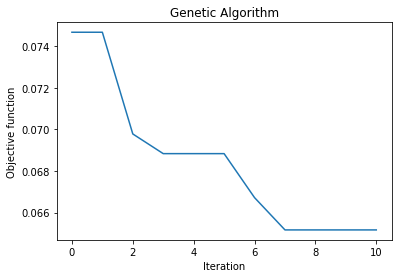


 Best Learning Rate:  0.0297

 Best Neuron Count:  7


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from geneticalgorithm import geneticalgorithm as ga

# sample data
X = np.random.rand(50,3)  # 50 samples - 3 features (temp, airflow, feedrate)
y = np.random.rand(50, 1) # target = drying efficiency

# create nn model with GA params
def create_model(learning_rate, neurons):
    model = keras.Sequential([
        keras.layers.Dense(int(neurons), activation='relu', input_shape = (3,)),
        keras.layers.Dense(1) #output
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate), loss='mse')
    
    return model

# GA objective function = minimize
def fitness(params):
    lr, neurons = params
    model = create_model(lr, neurons)
    model.fit(X, y, epochs=5, batch_size=10, verbose =0)
    loss = model.evaluate(X, y, verbose=0)
    return loss

# search space
bounds = np.array([
    [0.001, 0.05],  #learning rate
    [4, 20]    #neurons
])

# run GA
params = {
    'max_num_iteration' : 10,
    'population_size' : 5,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,     # This was missing
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
    
}

ga_model = ga(function=fitness, dimension=2, variable_type='real', variable_boundaries=bounds, algorithm_parameters=params)
ga_model.run()

best = ga_model.output_dict['variable']
print("\n Best Learning Rate: ", round(best[0], 4))
print("\n Best Neuron Count: ", int(best[1]))

In [24]:
help(ga)

Help on class geneticalgorithm in module geneticalgorithm.geneticalgorithm:

class geneticalgorithm(builtins.object)
 |  geneticalgorithm(function, dimension, variable_type='bool', variable_boundaries=None, variable_type_mixed=None, function_timeout=10, algorithm_parameters={'max_num_iteration': None, 'population_size': 100, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}, convergence_curve=True, progress_bar=True)
 |  
 |  Genetic Algorithm (Elitist version) for Python
 |  
 |  An implementation of elitist genetic algorithm for solving problems with
 |  continuous, integers, or mixed variables.
 |  
 |  
 |  
 |  Implementation and output:
 |      
 |      methods:
 |              run(): implements the genetic algorithm
 |              
 |      outputs:
 |              output_dict:  a dictionary including the best set of variables
 |          found and the value of

## Assignment 03: Clonal Selection 

- Initialization: Generate random antibodies (solutions).

- Selection: Pick the best antibodies based on fitness.

- Cloning: Make copies of the best antibodies.

- Mutation: Slightly modify clones to explore better solutions.

- Replacement: Replace weak antibodies with improved clones.

- Repeat until convergence.

In [31]:
import numpy as np

def fitness(x):
    return x * np.sin(10 * np.pi * x) + 1

def create_population(size):
    return np.random.rand(size)

def clone_best(population, fitness_scores):
    best_index = np.argmax(fitness_scores)
    best_sol = population[best_index]
    
    clones = np.full(5, best_sol)  #5 copies of best
    return clones

def mutate(clones):
    mutation_strenght = 0.05
    noise = np.random.randn(len(clones)) * mutation_strenght
    
    mutated = clones + noise
    return np.clip(mutated, 0, 1)  #keep in range [0, 1]

def run_clonal_selection():
    population = create_population(10)
    
    for gen in range(10):
        scores = fitness(population)
        clones = clone_best(population, scores)
        mutated_clones = mutate(clones)
        
        # combine and pick best 10
        all_candidates = np.concatenate((population, mutated_clones))
        all_scores = fitness(all_candidates)
        
        best_indices = np.argsort(all_scores)[-10:]
        
        population = all_candidates[best_indices]
        
        print(f"Generation {gen + 1}: Best = {max(all_scores): .4f}")
        
    final_scores = fitness(population)
    best_index = np.argmax(final_scores)
    print("\n Best Solutions: ", population[best_index])
    print("\n Best Fitness: ", final_scores[best_index])
    
    
run_clonal_selection()

Generation 1: Best =  1.4132
Generation 2: Best =  1.4443
Generation 3: Best =  1.4443
Generation 4: Best =  1.4443
Generation 5: Best =  1.4443
Generation 6: Best =  1.4500
Generation 7: Best =  1.4500
Generation 8: Best =  1.4509
Generation 9: Best =  1.4509
Generation 10: Best =  1.4509

 Best Solutions:  0.4531316796945451

 Best Fitness:  1.450940396509073


## Assignment 04: AIS



Predicted: [0 0 0 1 0 0 1 1 1 0 1 0]
Actual:    [0 0 0 1 0 0 1 1 1 0 1 0]
Accuracy: 1.0


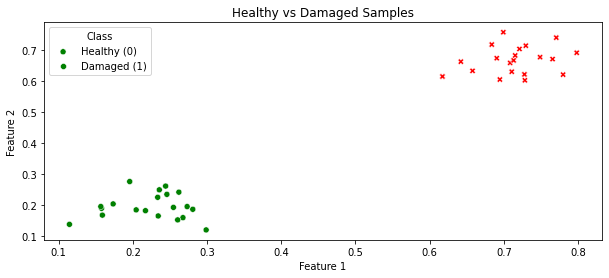

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate more data
healthy = np.random.normal(loc=0.2, scale=0.05, size=(20, 3))
damaged = np.random.normal(loc=0.7, scale=0.05, size=(20, 3))

# Label them
healthy = np.hstack((healthy, np.zeros((20, 1))))
damaged = np.hstack((damaged, np.ones((20, 1))))

# Combine
data = np.vstack((healthy, damaged))


# Split features and labels
X = data[:, :-1]
y = data[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_nsa(X_train, y_train):
    detectors = []
    for x, y in zip(X_train, y_train):
        if y == 1:  # learn non-self patterns only
            detectors.append(x)
    return detectors

def classify_nsa(x, detectors, threshold=0.2):
    for d in detectors:
        if np.linalg.norm(x - d) < threshold:
            return 1  # classified as damaged
    return 0  # classified as healthy

# Train phase
detectors = train_nsa(X_train, y_train)

# Predict phase
y_pred = np.array([classify_nsa(x, detectors) for x in X_test])

# Accuracy
print("Predicted:", y_pred)
print("Actual:   ", y_test.astype(int))
print("Accuracy:", accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simple Data Plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=data[:, 3], 
                palette={0: 'green', 1: 'red'}, style=data[:, 3],
                markers={0: 'o', 1: 'X'})
plt.title("Healthy vs Damaged Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class", labels=["Healthy (0)", "Damaged (1)"])
plt.show()


In [55]:
import random
import numpy as np
from deap import base, creator, tools

# Step 1: Define fitness function (maximize x * sin(x))
def fitness_function(individual):
    x = individual[0]
    return x * np.sin(x),  # Tuple!

# Step 2: Create types using creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize
creator.create("Individual", list, fitness=creator.FitnessMax)

# Step 3: Setup toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 10)  # Range: 0 to 10
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1.0, indpb=1.0)
toolbox.register("select", tools.selTournament, tournsize=3)

# Step 4: Run GA
population = toolbox.population(n=10)
N_GEN = 5

for gen in range(N_GEN):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.7:
            toolbox.mate(child1, child2)
            del child1.fitness.values, child2.fitness.values

    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate fitness
    for ind in offspring:
        if not ind.fitness.valid:
            ind.fitness.values = toolbox.evaluate(ind)

    population[:] = offspring

# Step 5: Get best solution
top = tools.selBest(population, k=1)[0]
print("Best Individual:", top)
print("Fitness Value:  ", fitness_function(top)[0])

Best Individual: [7.996252640769594]
Fitness Value:   7.915462819017114
